In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
def pseudo_weight(t,T1=100,T2=600,alpha_f=3):

    '''
    EQN 16 from: http://deeplearning.net/wp-content/uploads/2013/03/pseudo_label_final.pdf
    
    Default values for T1, T2 and alpha_f are from paper
    '''

    if t < T1:
        return 0
    elif t >= T2:
        return alpha_f 
    else: #T1 <= t < T2
        return alpha_f*(t-T1)/float(T2-T1) 


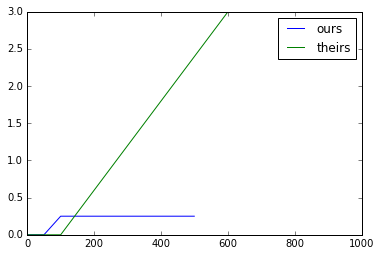

In [19]:
weights=[]
for i in range(500):
    weights.append(pseudo_weight(i,T1=50,T2=100,alpha_f=0.25))
    
orig_weights=[]
for i in range(1000):
    orig_weights.append(pseudo_weight(i,T1=100,T2=600,alpha_f=3))
    
plt.plot(range(len(weights)),weights,label='ours')
plt.plot(range(len(orig_weights)),orig_weights,label='theirs')
plt.legend()
plt.show()

In [18]:
import pickle
import torch
from torchvision import datasets, transforms

trainset_unlabeled = pickle.load(open("train_unlabeled.p", "rb"))

In [8]:
# functions to show an image
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [ ]:
shuffled_unlab_loader = torch.utils.data.DataLoader(trainset_unlabeled, batch_size=40, shuffle=True)
shuffled_unlab_loader.dataset.train_labels=torch.LongTensor([-1]*len(unlab_loader.dataset))

for images,_ in shuffled_unlab_loader:
    imshow(torchvision.utils.make_grid(images))
    break

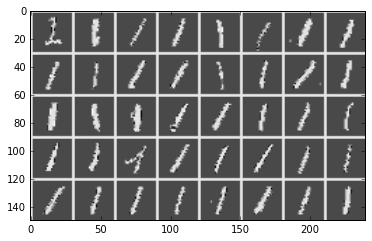

In [31]:
unshuffled_unlab_loader = torch.utils.data.DataLoader(trainset_unlabeled, batch_size=40, shuffle=False)
unshuffled_unlab_loader.dataset.train_labels=torch.LongTensor([-1]*len(unlab_loader.dataset))

for images,_ in unshuffled_unlab_loader:
    imshow(torchvision.utils.make_grid(images))
    break